# 像素坐标转换为三维坐标

```
@作者: 阿凯爱玩机器人
@QQ: 244561792
@微信: xingshunkai
@邮箱: xingshunkai@qq.com
@网址: deepsenserobot.com
@B站: "阿凯爱玩机器人"
```


## 导入依赖

In [1]:
# 将pyorbbecsdk的动态链接库所在的文件夹，添加到Python Path
import sys
import os

# 导入阿凯写的Orbbec工具库, 确保orbbec_utils.py跟你目前所执行的脚本在同一级目录下
from orbbecsdk_utils import *
# 添加Python Path
add_path_pyorbbecsdk()

# 导入pyorbbecsdk
from pyorbbecsdk import *

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## 相机初始化

In [3]:
# 连接设备
ret, device = connect_device()
print(f"[INFO] 设备是否连接成功: {ret}")

# pipeline初始化
pipeline = init_pipeline(device)
# 清空缓冲区
empty_cache(pipeline)

# 获取pipeline的相机参数
camera_param = pipeline.get_camera_param()

[05/25 00:00:19.695478][info][63866][Context.cpp:68] Context created with config: default config!
[INFO] 设备是否连接成功: True
[05/25 00:00:19.695500][info][63866][Context.cpp:73] Work directory=/home/kyle/Project/奥比中光3D相机/Gemini2-软件资料-阿凯爱玩机器人/02.奥比中光-pyobbecsdk示例代码, SDK version=v1.10.5-20240511-7dc8be9
[05/25 00:00:19.695519][info][63866][LinuxPal.cpp:31] createObPal: create LinuxPal!
[05/25 00:00:19.763539][info][63866][LinuxPal.cpp:142] Create PollingDeviceWatcher!
[05/25 00:00:19.763566][info][63866][DeviceManager.cpp:15] Current found device(s): (1)
[05/25 00:00:19.763571][info][63866][DeviceManager.cpp:24] 	- Name: Orbbec Gemini 335, PID: 0x0800, SN/ID: CP1L44P00049, Connection: USB3.2
[05/25 00:00:20.232127][error][63866][HostProtocol.cpp:420] Set property value failed! propertyId:63, rc:{statusCode: 9, respErrorCode: 2, msg: }
[05/25 00:00:20.232415][error][63866][HostProtocol.cpp:420] Set property value failed! propertyId:63, rc:{statusCode: 9, respErrorCode: 2, msg: }


[WARN] 彩图获取失败
[WARN] 彩图获取失败
[WARN] 彩图获取失败
[WARN] 彩图获取失败
[WARN] 彩图获取失败
[WARN] 彩图获取失败
[WARN] 彩图获取失败
[WARN] 彩图获取失败
[WARN] 彩图获取失败
[WARN] 彩图获取失败


## 读取彩图与深度图

设备刚初始化的时候，前几帧图像获取可能会失败。capture函数会自动重试。 

In [4]:
ret, color_img, depth_img = capture(pipeline)

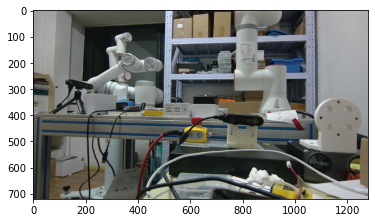

In [5]:
# 绘制彩图
if color_img is not None:
    plt.imshow(color_img[:, :, ::-1])

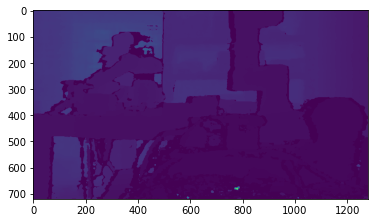

In [6]:
# 绘制深度图
if depth_img is not None:
    plt.imshow(depth_img)

## 获取特定像素下的深度

In [7]:
# 定义像素坐标
# 注意事项: 如果你的深度图在这个深度下的深度值无效, 可以自己指定一个像素坐标。 
px = 700
py = 500

# 读取深度值
# 注意事项: 
# 1. 索引的时候Y坐标在前， X坐标在后。
# 2. 深度图中的深度值的单位是mm
depth_mm = depth_img[py, px]
print(f"像素坐标: ({px}, {py})  深度值: {depth_mm} mm")

像素坐标: (700, 500)  深度值: 668.0 mm


## 转换为相机坐标系下的三维坐标

In [8]:
cam_xyz = pixel2point3d(px, py, depth_mm, camera_param)
print(f"相机坐标系下的三维坐标: {cam_xyz}")

相机坐标系下的三维坐标: [51.36574326943955, 135.97598625349454, 668.0]
